## 采用线性同余法作为伪随机数生成算法
#### 提交人：杨星              
#### 学号：51194506042

In [1]:
import numpy as np
import pandas as pd 
import math

### Step1 定义伪随机数生成算法

**线性同余法公式**：$$x_{i+1} = (a\;\times\;x_{i}\;+\;b)(mod\;m) $$
**其中:**
- $x_{i}$是初始值即随机数种子
- m是模数也是产生随机数的周期
- c是增量
- a是乘数

**通过设置上面参数，产生随机序列$x_{n}$**

In [2]:
#该类即实现了线性同余法，在构造函数中设置了参数
class MyGenerator:
    def __init__(self):
        self.mulFatctor = 16807                  #设置了乘数a         
        self.modFatctor = math.pow(2,31)-1       #设置了模数m
        self.acc = 0                             #设置了增量c
    #randseed:随机数种子
    #dataNum:一次性生成的随机数个数
    #函数返回值：长度为dataNum的伪随机数序列
    def linearCongruential(self,randseed = 5,dataNum=100):
        res = np.zeros(dataNum,dtype=float)
        x = randseed
        for i in range(dataNum):
            x = (self.mulFatctor*x+self.acc)%self.modFatctor
            y = x/self.modFatctor       #归一化化处理，是生成的随机数范围是[0,1]
            res[i] = y
        return res  

### Step2 生成随机数

#### 这里调用了10次随机数生成函数，每次生成10000个伪随机数序列,随机数范围是[0,1]

In [3]:
dataNum = 10000
randomArray = np.zeros((dataNum,10),dtype=float)
myGenerator = MyGenerator()
for i in range(10):
    randomArray[:,i] = myGenerator.linearCongruential(i+1,dataNum)

### Step3 结果验证（通过均值与方差进行验证）
#### 如果随机变量X在区间[a,b]上满足均匀分布，那么均值为$（b-a)\div 2$,方差是$（b-a)^{2}\div12$
#### 如果在区间[0,1]上满足均匀分布，那么均值应该是0.5，方差应该是1/12（0.833333）。

#### 3.1 绘制每次生成随机序列的频率分布直方图

(10000, 10)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016AAFAB6940>,
      dtype=object)

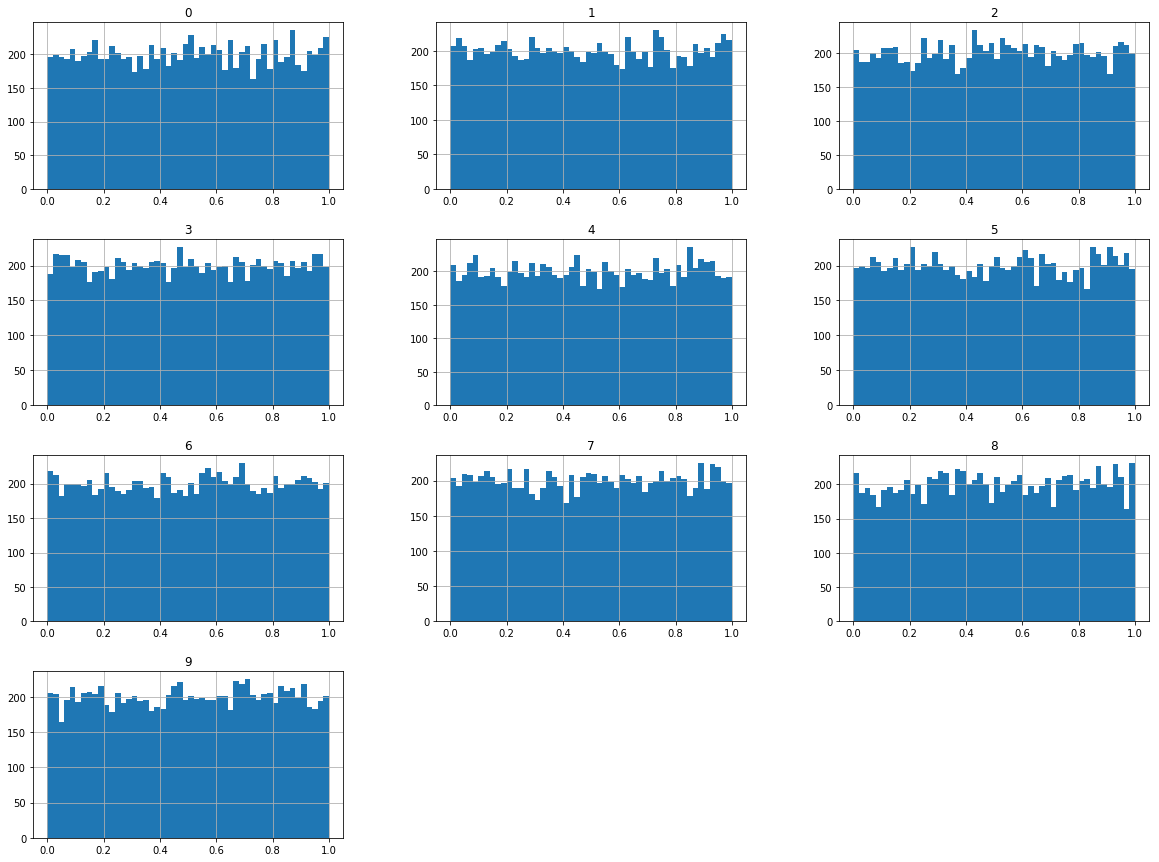

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
print(randomArray.shape)
mydf = pd.DataFrame(randomArray)
mydf.hist(bins=50,figsize=(20,15))

**从图像上看，10次实验分布较为均匀**

#### 3.2 计算均值

In [5]:
print(mydf.mean(axis= 0))

0    0.501827
1    0.499354
2    0.502780
3    0.500407
4    0.501134
5    0.501161
6    0.501588
7    0.501215
8    0.505241
9    0.502968
dtype: float64


**从结果上看,10次测试的序列均值基本在0.5附近波动，满足均匀分布的要求**

#### 3.3 计算方差

In [6]:
print(mydf.var(axis=0))

0    0.083652
1    0.084742
2    0.082651
3    0.084037
4    0.084037
5    0.084366
6    0.083588
7    0.084356
8    0.083062
9    0.083079
dtype: float64


**从结果上看,10次测试的序列方差都接近于0.83，基本满足要求**